# Klasyfikacja za pomocą algorytmu wektorów wspierających (SVM)

Na tych ćwiczeniach zapoznamy się z zastosowaniem SVM do klasyfikacji.


In [22]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.metrics import classification_report, confusion_matrix

def printScores(model, X, Y):
    # użyj classification_report() żeby policzyć najpopularniejsze miary 
    print("Classification report:")
    print(classification_report(Y, model.predict(X)))
    # wypisz macierz pomyłek 
    print("Confusion matrix:")
    print(confusion_matrix(Y, model.predict(X)))

## Zbiór danych irysy
Tak jak w notebooku "Naiwny klasyfikator Bayesa" używać będziemy zbiór `Iris`. Dla wygodny ponownie umieścimy dane w `pandas.DataFrame`.

Proszę:
- załadować dane za pomocą `sklearn.dataset.load_iris`,
- umieścić dane w `pandas.DataFrame`,
- wypisać dostępne kolumny.



In [23]:
# iris = ...
# iris_df = ...
### BEGIN SOLUTION
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["label"] = iris.target
### END SOLUTION
print(iris_df.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'label'],
      dtype='object')


## Klasyfikacja liniowa SVM

#### Przygotowanie danych

W pierwszej części ćwiczeń zapoznamy się ze specyfiką modeli SVM. Wyłącznie w celu ułatwienia wizualizacji ograniczymy się na razie do dwóch cech i dwóch klas. 

Proszę:
- utworzyć nowy `pandas.DataFrame` zawierający jedynie cechy `petal width (cm)`,  `petal length (cm)` dla klas `0`, `1`,
- wypisać na ekran początkowe wiersze (`pandas.DataFrame.head`).

In [24]:
chosen_features=['petal length (cm)','petal width (cm)']
drop_columns=['sepal length (cm)','sepal width (cm)']
# df = ...
### BEGIN SOLUTION
df = iris_df[(iris_df.label== 0) | (iris_df.label== 1)]
df = df.drop(columns=drop_columns)
df.head()
### END SOLUTION


petal length (cm)  petal width (cm)  label
0                1.4               0.2      0
1                1.4               0.2      0
2                1.3               0.2      0
3                1.5               0.2      0
4                1.4               0.2      0

### Analiza wizualna danych
Proszę:
- narysować wykres punktowy cech `petal length (cm)`, `petal width (cm)` w zależności od klasy,
- na podstawie rysunku stwierdzić, czy klasy są łatwo separowalne.

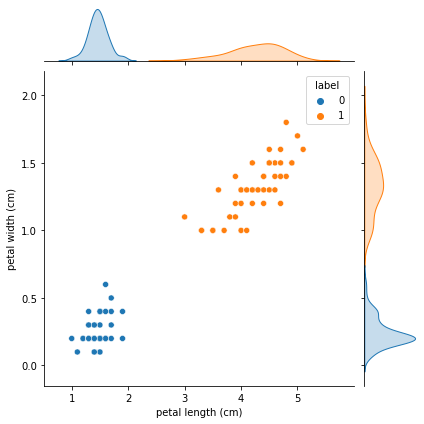

In [25]:
# sns.jointplot(...)
### BEGIN SOLUTION
sns.jointplot(x=chosen_features[0], y=chosen_features[1], data=df, hue='label')
### END SOLUTION

#### Trening klasyfikatora

Proszę:
- zaimportować model `SVC` z `sklearn.svm`. Aby uzyskać model liniowy należy podać parametr `kernel = linear`,
- wyuczyć model na ostatnio przygotowanych danych,
- wypisać miary jakości za pomocą funkcji `printScores` używanej na poprzednich ćwiczeniach,
- na podstawie analizy metryk stwierdzić, jak dobrze klasy zostały odseparowane.

In [26]:
# model = ...
# model.fit(...)
# printScores(..)
### BEGIN SOLUTION
model = SVC(kernel='linear')
model.fit(df[chosen_features], df.label)
printScores(model, df[chosen_features], df.label)  
### END SOLUTION

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Confusion matrix:
[[50  0]
 [ 0 50]]


### Wizualizacja separacji klas
Wynik naszego modelu możemy zobrazować za pomocą położenia wektorów wspierających oraz granic funkcji decyzyjnej.

Proszę
- wypisać wektory wspierające za pomocą `SVC.support_vectors_`,
- na jednym rysunku narysować dane, wektory wspierające i granice funkcji decyzyjnej. Wykorzystaj zdefiniowane poniżej funkcje `plot_support_vectors` i `plot_decision_function`.

In [27]:
def plot_support_vectors(support_vectors, axis):
  axis.scatter(support_vectors[:,0], support_vectors[:,1],s=100,
               linewidth=1, facecolors='none', edgecolors='k')
  
def plot_decision_function(model, axis):
  xlim = axis.get_xlim()
  ylim = axis.get_ylim()
  xx = np.linspace(xlim[0], xlim[1], 30)
  yy = np.linspace(ylim[0], ylim[1], 30)
  YY, XX = np.meshgrid(yy, xx)
  xy = np.vstack([XX.ravel(), YY.ravel()]).T
  Z = model.decision_function(xy).reshape(XX.shape)

  axis.contour(
      XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
  )

[[1.9 0.4]
 [3.  1.1]]


/usr/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


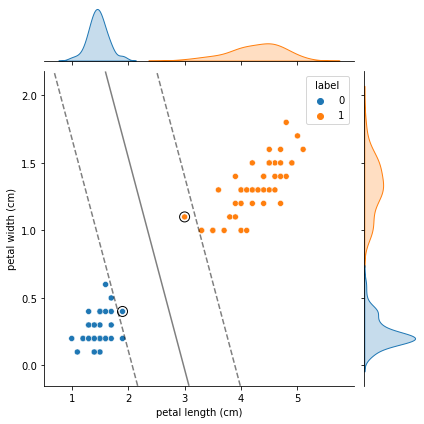

In [28]:
# print(...)
# graph=sns.jointplot(...)
# plot_support_vectors(...)
# plot_decision_function(...)
### BEGIN SOLUTION
print(model.support_vectors_)

graph=sns.jointplot(x=chosen_features[0], y=chosen_features[1], data=df, hue='label')
plot_support_vectors(model.support_vectors_, graph.ax_joint)
plot_decision_function(model, graph.ax_joint)
### END SOLUTION

Poprzednim razem, gdy pracowaliśmy ze zbiorem danych `Iris` zaczeliśmy od znormalizowania danych. Sprawdźmy, czy normalizacja wpływa na model SVM.
Poprzednim razem sami implementowaliśmy normalizację, teraz zrobimy to za pomocą `sklearn.preprocessing.StandardScaler`

Proszę:
- utworzyć nowy `pandas.DataFrame` zawierający znormalizowane cechy `['petal length (cm)','petal width (cm)']`. Do normalizacji wykorzystaj `sklearn.preprocessing.StandardScaler`,
- utworzyć model liniowy SVM i wyuczyć go na znormalizowanych danych,
- na jednym rysynku przedstawić znormalizowane dane oraz wektory wspierające i granicę decyzyjną modelu.


In [29]:
from sklearn.preprocessing import StandardScaler

/usr/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


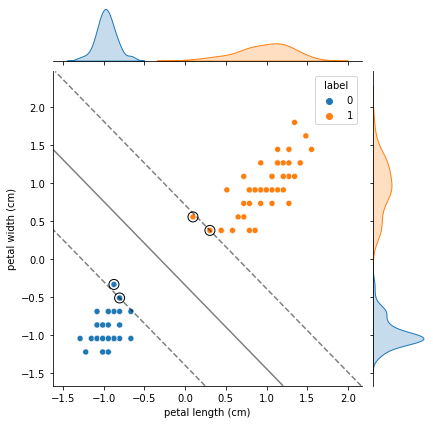

In [30]:
# df_norm = ...
# scaler = ...
# model = ...
### BEGIN SOLUTION
df_norm=pd.DataFrame()
df_norm['label']=df.label
scaler=StandardScaler()
df_norm[chosen_features]=scaler.fit_transform(df[chosen_features])

model = SVC(kernel='linear')
model.fit(df_norm[chosen_features], df_norm.label)

graph=sns.jointplot(x=chosen_features[0], y=chosen_features[1], data=df_norm, hue='label')
plot_support_vectors(model.support_vectors_, graph.ax_joint)
plot_decision_function(model, graph.ax_joint)
### END SOLUTION

Porównując z poprzednim rysunkiem, powinniśmy otrzymać inną granicę decyzyjną pomimo tego, że dane mają ten sam kształt.

**Normalizacja jest bardzo ważna dla modeli SVM!**

### Klasyfikacja miękkiego marginesu

Sprawdźmy teraz, jak model liniowy SVM sprawdzi się do klasyfikacji klas `1` i `2`, które nie są już w pełni odseparowane

Proszę:
- przygotować nowy `pandas.DataFrame` zawierający znormalizowane cechy `['petal length (cm)','petal width (cm)']` dla klas `1`, `2`,
- narysować przygotowany zbiór danych,
- na podstawie analizy rysunku stwierdzić, czy dane są łatwo separowalne, czy też klasy się częściowo przekrywają.

In [31]:
# df = ...
### BEGIN SOLUTION
df = iris_df[(iris_df.label== 1) | (iris_df.label== 2)]
df = df.drop(columns=drop_columns)
scaler=StandardScaler()
df[chosen_features]=scaler.fit_transform(df[chosen_features])
### END SOLUTION
df.head()

petal length (cm)  petal width (cm)  label
50          -0.250779         -0.653039      1
51          -0.494254         -0.416431      1
52          -0.007304         -0.416431      1
53          -1.102941         -0.889647      1
54          -0.372516         -0.416431      1

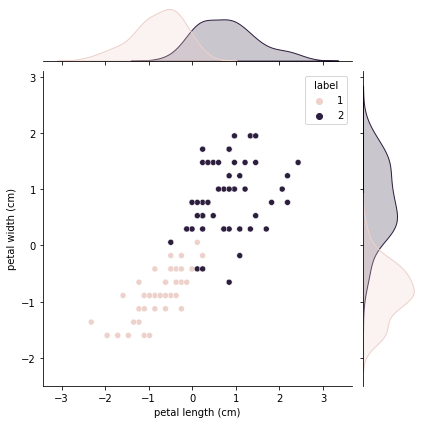

In [32]:
# sns.jointplot(...)
### BEGIN SOLUTION
sns.jointplot(x=chosen_features[0], y=chosen_features[1], data=df, hue='label')
### END SOLUTION

Proszę:
- utworzyć model liniowy SVM i wyuczyć go na zbiorze danych,
- narysować zbiór danych oraz wektory wspierające i granice funkcji decyzyjnej,modelu
- wypisać miary jakości.


/usr/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Classification report:
              precision    recall  f1-score   support

           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100

Confusion matrix:
[[47  3]
 [ 3 47]]


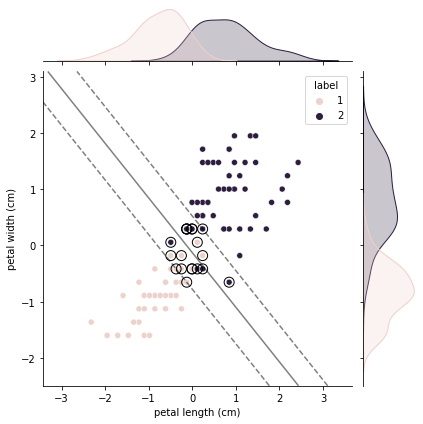

In [33]:
### BEGIN SOLUTION
model = SVC(kernel='linear')
model.fit(df[chosen_features], df.label)

graph=sns.jointplot(x=chosen_features[0], y=chosen_features[1], data=df, hue='label')
plot_support_vectors(model.support_vectors_, graph.ax_joint)
plot_decision_function(model, graph.ax_joint)
printScores(model, df[chosen_features], df.label)  
### END SOLUTION

Tym razem klasy nie są odseparowane, więc model musi czasem się mylić.

Model SVM ma hiperparametr `C` odpowiadający za szerokość marginesu.

Proszę:
- narysować dane, granice decyzyjne i wektory nośne dla hiperparametru `C` równego `0.1`, `1`,`100`.

/usr/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


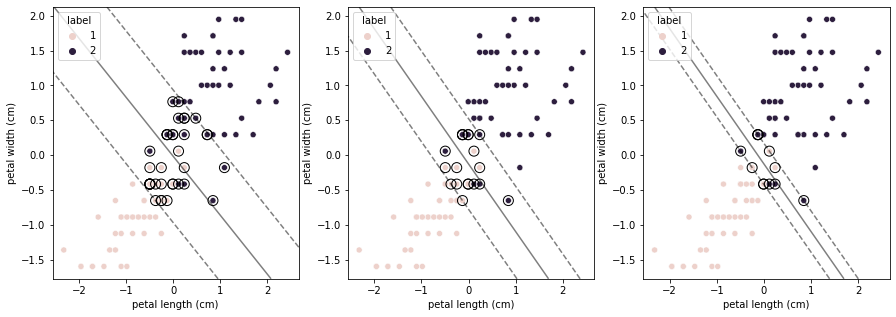

In [34]:
fig, axes=plt.subplots(1,3, figsize=(15,5))
C_range=[0.1,1,100]
for ax, C in zip(axes, C_range):
  # model = ...
  # model.fit(...)
  # graph=sns.scatterplot( ..., ax=ax)
  # plot_support_vectors(...)
  # plot_decision_function(...)
  ### BEGIN SOLUTION
  model = SVC(kernel='linear', C=C)
  model.fit(df[chosen_features], df.label)
  graph=sns.scatterplot(x=chosen_features[0], y=chosen_features[1], data=df, hue='label',ax=ax)
  plot_support_vectors(model.support_vectors_,ax)
  plot_decision_function(model, ax)
  ### END SOLUTION

## Zbiory nieseparowalne liniowo

Liniowe klasyfikatory w wielu przypadkach sprawdzają się bardzo dobrze, jednak wiele zbiorów nie jest liniowo rozdzielnych.

#### Okręgi 
Na początek potrzebujemy wygenerować liniowo nierozdzielny zbiór danych. `sklearn.datasets` oferuje funkcję `make_circles` tworzącą dane w kształcie współśrodkowych okręgów, które z całą pewnością nie są liniowo separowalne.

Proszę:
- korzystając z `sklearn.datasets.make_circles` przygotować dane. Przygotuj 1000 punktów w skali 0.1 i z poziomem szumów równym 0.1,
- umieścić wygenerowane dane w `pandas.DataFrame` o kolumnach `x1`, `x2`, `label`,
- narysować wykres punktowy cech `x1` i `x2` z uwzględnieniem przynależności do klas.


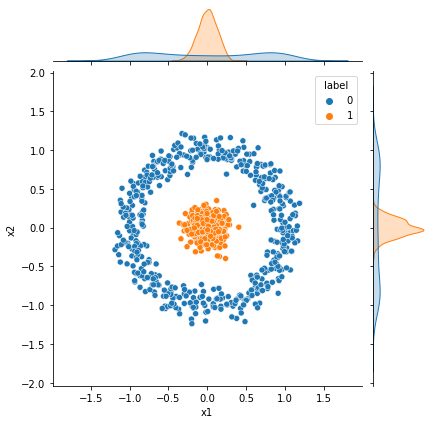

In [35]:
# X, y=datasets.make_circles(...)
# df = ...
# sns.jointplot(...)
### BEGIN SOLUTION
X, y= datasets.make_circles(1000, factor=.1, noise=.1)
df=pd.DataFrame(X, columns=('x1','x2'))
df['label']=y
sns.jointplot(x='x1',y='x2', data=df,hue='label')
### END SOLUTION

Dane mamy gotowe, sprawdźmy jak liniowy mode SVM sobie z nimi (nie)poradzi

Proszę:
- utworzyć model liniowy `SVM` i wyuczyć go na przygotowanych danych,
- narysować wykres punktowy cech `x1` i `x2` z uwzględnieniem ,przynależności do klas, wektorami nośnymi i granicami decyzyjnymi (wykorzystaj przygotowane wcześniej funkcje),
- wypisać miary jakości.

/usr/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.37      0.54       500
           1       0.61      1.00      0.76       500

    accuracy                           0.68      1000
   macro avg       0.81      0.68      0.65      1000
weighted avg       0.81      0.68      0.65      1000



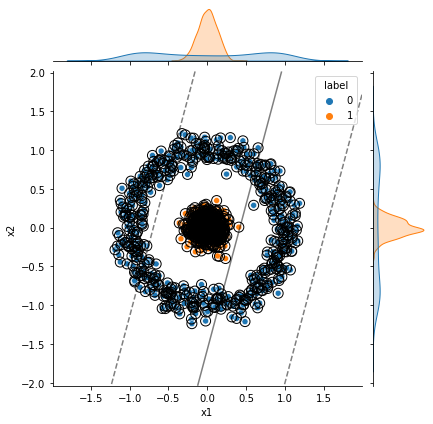

In [36]:
### BEGIN SOLUTION
model = SVC(kernel='linear')
model.fit(df.drop(columns=['label']), df.label)
graph=sns.jointplot(x='x1', y='x2', data=df, hue='label')
plot_support_vectors(model.support_vectors_, graph.ax_joint)
plot_decision_function(model, graph.ax_joint)
print(classification_report(df.label, model.predict(df[['x1','x2']])))
### END SOLUTION

Jedną z możliwości poradzenie sobie z takim problem jest _feature engineering_, tzn. dodanie nowych cech, które lepiej opisywać będą nasz model. Jeżeli wymyślimy cechę, w której nasze dane będą separowalne liniow to możemy dalej przeprowadzać klasyfikację liniową. W przypadku naszego zbioru danych w kształcie okręgów taką cechą jest ich promień.

Proszę:
- dodać nową cechę `radius` będącą pierwiastkiem sumy kwadratów cech `x1` i `x2`,
- narysować wykres punktowy cech `x1` i `radius` z uwzględnieniem przynależności do klas,
- utworzyć model i wyuczyć go na przygotowanych danych,
- wypisać miary jakości.

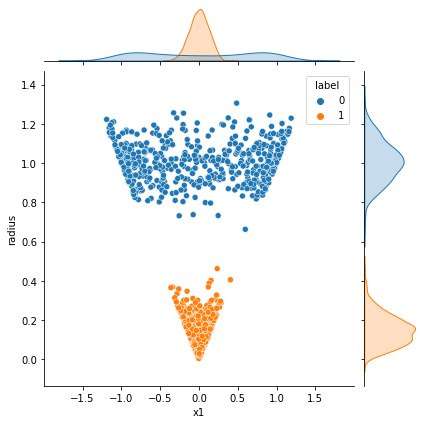

In [37]:
# df['radius'] = ...
# sns.jointplot(...)
### BEGIN SOLUTION
df['radius']=(df.x1**2+df.x2**2)**0.5
sns.jointplot(x='x1',y='radius', data=df,hue='label')
### END SOLUTION

/usr/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



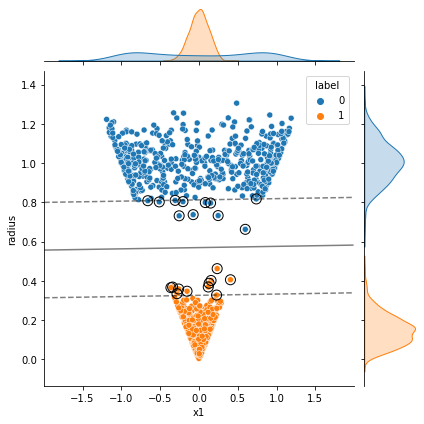

In [38]:
### BEGIN SOLUTION
model = SVC(kernel='linear')
model.fit(df[['x1','radius']], df.label)
graph=sns.jointplot(x='x1', y='radius', data=df, hue='label')
plot_support_vectors(model.support_vectors_, graph.ax_joint)
plot_decision_function(model, graph.ax_joint)
print(classification_report(df.label, model.predict(df[['x1','radius']])))
### END SOLUTION

#### Sierpy

Dla danych o kształcie okręgów udało nam się wymyślić cechę pozwalającą na separację liniową. Zazwyczaj jednak wymyślenie takiej cechy jest bardzo trudne i wymaga bardzo dużej wiedzy o zbiorze danych.

Spróbujmy szczęścia ze zbiorem w kształcie sierpów generowanym przez `sklearn.datasets.make_moons`.

Proszę (większość kodu można przekopiować z przykładu z okręgami):
- korzystając z `sklearn.datasets.make_moons` przygotować dane. Przygotuj 1000 punktów z poziomem szumów równym 0.1,
- umieścić wygenerowane dane w `pandas.DataFrame` o kolumnach `x1`, `x2`, `label`,
- narysować wykres punktowy cech `x1` i `x2` z uwzględnieniem przynależności do klas.



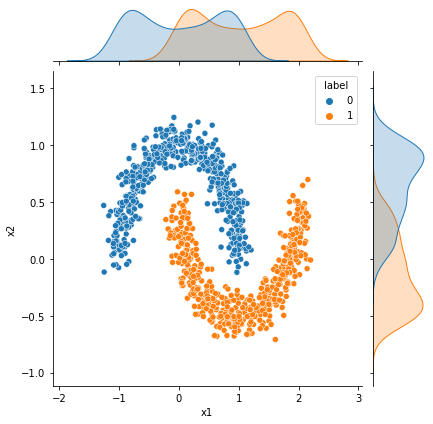

In [39]:
# X, y = datasets.make_moons(...)
# df = ...
# sns.jointplot(...)
### BEGIN SOLUTION
X, y= datasets.make_moons(1000, noise=.1)
df=pd.DataFrame(X, columns=('x1','x2'))
df['label']=y
sns.jointplot(x='x1',y='x2', data=df,hue='label')
### END SOLUTION

Po krótkim namyśłe prawdopobnie nie jesteśmy wstanie podać żadnej cechy, która rozwiązałaby nasz problem. W takim razie możemy podążyć kilkoma drogami:
1. Dalej brnąć w modyfikowanie zbioru danych, np. dodać kolejne cechy korzystając z rozwinięcia wielomianowego (np. dla rozwinięcią wielomianowego stopnia 2  ze zbioru cech `(a,b,c)` dostaniemy cechy `(a, b, c, a*b, a*c, b*c, a*a, b*b, c*c)`. W tym przypadku ryzykujemy, że znacząco zwiększymy rozmiar zbioru danych, większość wygenerowanych cech i tak nie będzie zbyt istotna, a model stanie się bardziej podatny na przetrenowanie. `sklearn.preprocessing` ma oczywiście przygotowaną do tego gotową funkcję `PolynomialFeatures`.
1. Zmienić model na nieliniowy.

## Klasyfikacja nieliniowa SVM

W dalszej części wybierzemy opcję 2., co w naszym przypadku oznacza odejście od modelu liniowego SVM na rzecz modeli SVM z jądrem. Przetestujemy jądra wielomianowe oraz gaussowkie rbf.


Proszę:
- wyszkolić serię modeli SVM z jądrem wielomianowym o stopniach `2`, `3` i `4`. Rodzaj jądra można ustawić parametrem `kernel = 'poly'`, natomiast za stopnień wielomianu odpowiada `degree`. Parametr `C` powinien być taki sam dla wszystkich modeli, proszę użyć `0.1`,
- dla każdego modelu wykonać rysunek danych, wektorów wspierających i granicy decyzyjnej.


/usr/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


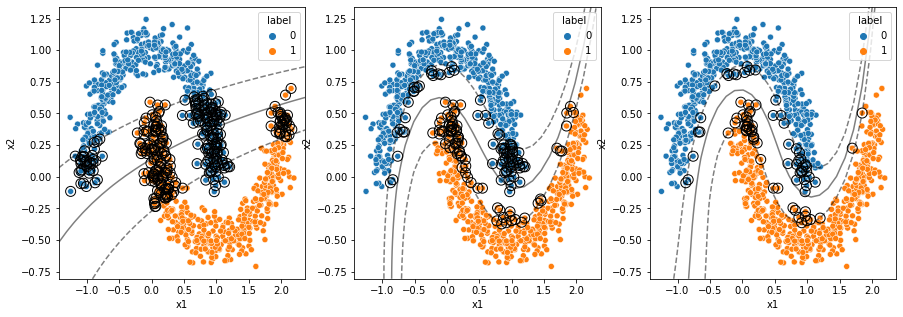

In [40]:
_, axes=plt.subplots(1,3, figsize=(15,5))
degree_range=[2,3,4]
for ax, degree in zip(axes, degree_range):
  # model = SVC(kernel='poly', C=0.1, coef0=1,...)
  ### BEGIN SOLUTION
  model =  SVC(kernel='poly', C=0.1, degree=degree, coef0=1)
  model.fit(df[['x1','x2']], df.label)
  sns.scatterplot(x='x1', y='x2', data=df, hue='label',ax=ax)
  plot_support_vectors(model.support_vectors_, ax)
  plot_decision_function(model, ax)
  ### END SOLUTION

Proszę:
- wyszkolić serię modeli SVM z jądrem gaussowskim `rbf` o współczynnikach $\gamma $ równych `0.01`, `1` i `10`. Rodzaj jądra można ustawić parametrem `kernel = 'rbf'`, natomiast współczynnik $\gamma$ można kontrolować parametrem `gamma`. Parametr `C` powinien być taki sam dla wszystkich modeli, proszę użyć `0.1`,
- dla każdego modelu wykonać rysunek danych, wektorów wspierających i granicy decyzyjnej.

/usr/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


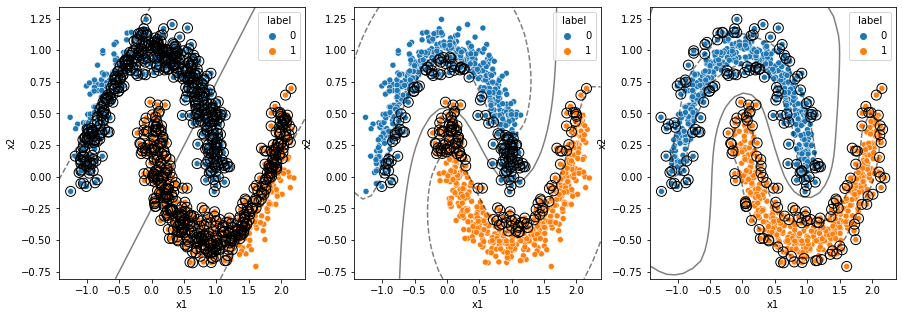

In [41]:
_, axes=plt.subplots(1,3, figsize=(15,5))
gamma_range=[0.01,1,10]
for ax, gamma in zip(axes, gamma_range):
  # model = SVC(kernel='rbf', C=0.1, ...)
  ### BEGIN SOLUTION
  model = SVC(kernel='rbf', C=0.1, gamma=gamma)
  model.fit(df[['x1','x2']], df.label)
  sns.scatterplot(x='x1', y='x2', data=df, hue='label',ax=ax)
  plot_support_vectors(model.support_vectors_, ax)
  plot_decision_function(model, ax)
  ### END SOLUTION

### Klasyfikacja SVM irysów


Mając już pewne doświadczenie z modelami SVM wracamy do zbiorów irysów. Wciąż pracować będziemy z tymi samymi dwiema cechami (żeby  łatwo robić rysunki), ale tym razem będziemy pracować na wszystkich klasach, na poważnie dobierzemy hiperparametry i ocenimy jakość klasyfikacji.

Proszę:
- przygotwać nowy `pandas.DataFrame` zawierający znormalizowane cechy `['petal length (cm)','petal width (cm)']` dla klas `1`, `2`,
- podzielić zbiór danych na zbiór treningowy i testowy. Zbiór testowy powinien wynosić `0.3` całego zbioru,
- ustalić normalizację na zbiorze treningowym, następnie znormalizować oba zbiory,
- wytrenować CVM z jądrem RBF  parametrami `gamma=1, C=0.1`,
- wypisać wartości metryk na danych testowych dla uzyskanego modelu.

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
# df = ...
# X_train, X_test, y_train, y_test = train_test_split(...)
### BEGIN SOLUTION
df=iris_df.drop(columns=drop_columns)
X_train, X_test, y_train, y_test = train_test_split(df[chosen_features], df.label, test_size=0.3, random_state=1)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
### END SOLUTION

In [44]:
model=SVC(kernel='rbf', gamma=1, C=0.1)
model.fit(X_train,y_train)
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



Korzystając z funkcji `plot_multiclass_decision(X, y, model)` zdefiniowanej poniżej proszę narysować granice podziału klas.

Proszę:
* stwierdzić, czy rysunek zgadza się z postacią macierzy pomyłek dla badanego modelu i danych.

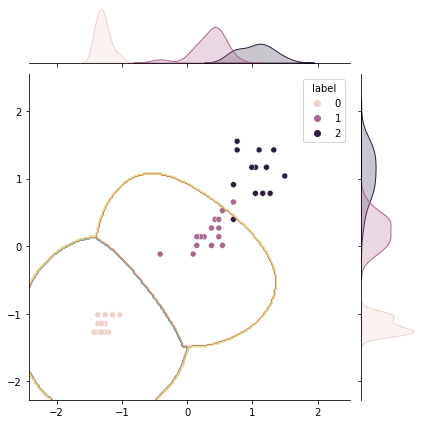

In [45]:
def plot_multiclass_decision(X, y, model):
  h=0.02
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  graph=sns.jointplot(x=X[:, 0], y=X[:, 1], hue=y)
  graph.ax_joint.contour(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plot_multiclass_decision(X_test,y_test, model)

## Strojenie modelu

Jeżeli interesuje nas otrzymanie najlepszego modelu to musimy znaleźć (dostroić) jego hiperparametry. Dla modelu SVM z jądrem możemy zmieniać hiperparametry takie jak `C`, rodzaj jądra i hiperparametry specyficzne dla jądra (`gamma` dla `rbf`, `degree` dla `poly`). Przeszukiwania takiej wielowymiarowej przestrzeni nie musimy implementować sami, gotowe narzędzia znajdują się w `sklearn.model_selection`:
- `GridSearchCV` wykonujący systematyczny skan przestrzeni hiperparametrów,
- `RandomizedSearchCV` losowo ją próbkujący.

Proszę:

- przygotować przestrzeń parametrów do przeszukania. Dla każdego typu jądra przygotuj słownik, gdzie kluczem jest nazwa parametru, a wartością jego zakres. Słownik powinien zawierać element o kluczu `kernel` o wartości będącej jednoelementową listą z nazwą jądra, np. `poly` dla wielomianowego,
  - dla wszystkich jąder przeszukaj parametr `C` w zakresie od 0.01 do 100 rozłożonym równomiernie w skali logarytmicznej (`np.logspace`).
  - dla jądra wielomianowego przeszukaj stopnie wielomianu równe 2,3,4.
  - dla jądra rbf przeszukaj parametr `gamma` w zakresie od 0.01 do 100 rozłożonym równomiernie w skali logarytmicznej,
- przygotować `GridSearchCV
` dla modelu `SVC` w zdefiniowanej przestrzeni parametrów. Jako kryterium oceniające model przyjmij `scoring = accuracy`,
- za pomocą `GridSearch.fit` znaleźć najlepsze parametry,


In [46]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from scipy.stats import uniform, expon


In [47]:
parameters_poly=dict(kernel=['poly'], C=np.logspace(-2,2,30), degree=[2,3,4])
parameters_linear=dict(kernel=['linear'], C=np.logspace(-2,2,30))
parameters_rbf=dict(kernel=['rbf'], C=np.logspace(-2,2,30), gamma=np.logspace(-2,2,30))
parameters=[parameters_poly,parameters_linear, parameters_rbf]
grid_search=GridSearchCV(SVC(),parameters, scoring='accuracy')
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': array([1.00000000e-02, 1.37382380e-02, 1.88739182e-02, 2.59294380e-02,
       3.56224789e-02, 4.89390092e-02, 6.72335754e-02, 9.23670857e-02,
       1.26896100e-01, 1.74332882e-01, 2.39502662e-01, 3.29034456e-01,
       4.52035366e-01, 6.21016942e-01, 8.53167852e-01, 1.17210230e+00,
       1.61026203e+00, 2.21221629e+00, 3.03919538e+00, 4.17531894e+...
       1.26896100e-01, 1.74332882e-01, 2.39502662e-01, 3.29034456e-01,
       4.52035366e-01, 6.21016942e-01, 8.53167852e-01, 1.17210230e+00,
       1.61026203e+00, 2.21221629e+00, 3.03919538e+00, 4.17531894e+00,
       5.73615251e+00, 7.88046282e+00, 1.08263673e+01, 1.48735211e+01,
       2.04335972e+01, 2.80721620e+01, 3.85662042e+01, 5.29831691e+01,
       7.27895384e+01, 1.00000000e+02]),
                          'kernel': ['rbf']}],
             scoring='accuracy')

Proszę:
- wypisać znalezione najlepsze parametry modelu (`GridSearchCV.best_params_`),
- wypisać wynik najlepszego modelu (`GridSearchCV.best_score_`),
- narysować narysować granice decyzyjne najlepszego modelu (najlepszy model dostępny jest pod `GridSearchCV.best_estimator_`),
- stwierdzić, czy najlepszy model jest lepszy od modelu które były trenowane poprzednio.

{'C': 0.035622478902624426, 'kernel': 'linear'}
0.980952380952381
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Confusion matrix:
[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


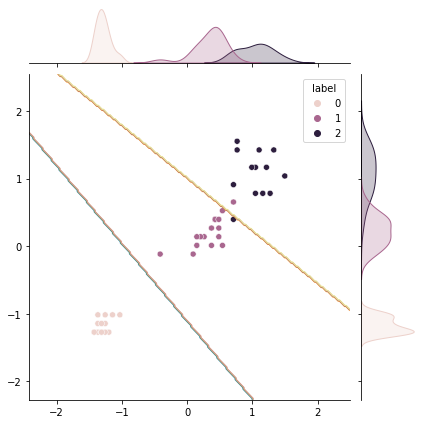

In [77]:
# print(...)
# print(...)
# plot_multiclass_decision(...)
### BEGIN SOLUTION
print(grid_search.best_params_)
print(grid_search.best_score_)
printScores(grid_search.best_estimator_, X_test, y_test) 
plot_multiclass_decision(X_test,y_test, grid_search.best_estimator_)
### END SOLUTION

Dla `RandomizedSearchCV` zamiast przestrzeni parametrów musimy przygotwać rozkład prawdopodobieństwa parametrów

Proszę
- przygotować rozkład prawdopodobieństwa parametrów. Dla każdego typu jądra przygotuj słownik, gdzie kluczem jest nazwa parametru, a wartością jego rozkład. Słownik powinien zawierać element o kluczu `kernel` o wartości będącej jednoelementową listą z nazwą jądra, np. `poly` dla wielomianowego.
  - dla wszystkich jąder przeszukaj parametr `C` o rozkładzie wykładniczym (`scipy.stat.expon` ) z parametrem `scale=100`,
  - dla jądra wielomianowego przeszukaj stopnie wielomianu o rozkładzie dyskretnym 2,3,4 (lista `[2,3,4]`),
  - dla jądra rbf przeszukaj parametr `gamma` o rozkładzie wykładniczym z parametrem `scale=0.1`,
- przygotować `RandomizedSearchCV` dla modelu `SVC` ze zdefiniowanym rozkładem parametrów. Jako kryterium oceniające model przyjmij `scoring = accuracy`,
- za pomocą `RandomizedSearchCV.fit` znaleźć najlepsze parametry.

Przykład dla jądra wielomianowego:

```python
distributions_poly=dict(kernel=['poly'], C=expon(scale=100), degree=[2,3,4])
```

In [50]:
distributions_poly=dict(kernel=['poly'], C=expon(scale=100), degree=[2,3,4])
distributions_linear=dict(kernel=['linear'], C=expon(scale=100))
distributions_rbf=dict(kernel=['rbf'], C=expon(scale=100), gamma=expon(scale=0.1))
distributions=[distributions_poly,distributions_linear, distributions_rbf]
random_search=RandomizedSearchCV(SVC(),distributions, scoring = 'accuracy' ,random_state=1, n_iter = 1000)
random_search.fit(X_train,y_train)

RandomizedSearchCV(estimator=SVC(), n_iter=1000,
                   param_distributions=[{'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa8f6d40430>,
                                         'degree': [2, 3, 4],
                                         'kernel': ['poly']},
                                        {'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa8f6d52070>,
                                         'kernel': ['linear']},
                                        {'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa8fc0c12e0>,
                                         'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa8f6a751f0>,
                                         'kernel': ['rbf']}],
                   random_state=1, scoring='accuracy')

Proszę:
- wypisać znalezione najlepsze parametry modelu (`RandomizedSearchCV.best_params_`),
- wypisać wynik najlepszego modelu (`RandomizedSearchCV.best_score_`),
- narysować narysować granice decyzyjne najlepszego modelu (najlepszy model dostępny jest pod `RandomizedSearchCV.best_estimator_`),
- analizyując macierz pomyłek i rysunek z podziałem klas stwierdzić czy udało się znaleźć model lepszy niż poprzednie.

{'C': 26.57336397771543, 'gamma': 0.0006147073333597117, 'kernel': 'rbf'}
0.9714285714285715
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Confusion matrix:
[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


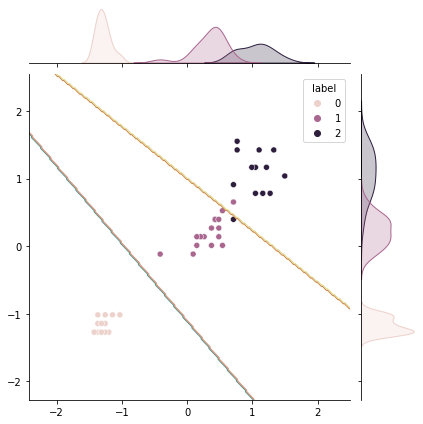

In [62]:
# print(...)
# print(...)
# plot_multiclass_decision(...)
### BEGIN SOLUTION
print(random_search.best_params_)
print(random_search.best_score_)
printScores(grid_search.best_estimator_, X_test, y_test) 
plot_multiclass_decision(X_test,y_test, random_search.best_estimator_)
### END SOLUTION